# 正态性检验方法
**正态性检验（Normality Test）**是统计学中用于判断数据是否服从正态分布（高斯分布）的重要方法。正态分布是许多统计模型（如t检验、ANOVA、线性回归等）的基础假设，因此验证数据的正态性至关重要。

# 图形法

## Q-Q图（分位数-分位数图）

### 基本原理
**Q-Q图（Quantile-Quantile Plot）**是一种用于比较两个概率分布或样本数据与理论分布之间差异的图形工具。它通过绘制分位数的对应关系来直观展示数据分布的特征，尤其在统计学和数据分析中常用于检验数据是否服从特定分布（如正态分布）。
- **核心思想**：将一组数据的分位数与另一组数据（或理论分布）的分位数进行比较。若两组分布相同，则点会近似落在一条直线上。
- **分位数（Quantile）**：将数据按大小排序后，处于特定比例位置的值（如中位数是50%分位数）。
- **常见用途**：
    - 检验数据是否服从正态分布（正态性检验）。
    - 比较两个样本是否来自同一分布。
    - 识别数据的偏态、厚尾或异常值。

### Q-Q图类型
- **样本 vs 理论分布（如正态Q-Q图）**：
    - 纵轴：样本数据的经验分位数。
    - 横轴：理论分布（如标准正态分布）的分位数。
    - 若样本服从理论分布，点会围绕直线 y=x分布。
- **样本 vs 样本**：
    - 比较两组数据的分布是否相同（如两组实验数据）。

### Q-Q图绘制步骤
以正态Q-Q图为例：
- **排序数据**：将样本数据$x_1, x_2, ..., x_n$按升序排列。
- **计算经验分位数**： 
    - 对第$i$个数据点，计算其分位数的位置（常用公式：$p_i = \frac{i-0.5}{n} 或 p_i = \frac{i}{n+1}$）。
- **计算理论分位数**： 
    - 对每个$p_i$，计算标准正态分布的分位数$z_i = \Phi^{-1}(p_i)$（$\Phi$为标准正态CDF）。
- **绘制散点图**： 
    - 横轴：理论分位数$z_i$
    - 纵轴：样本分位数$x_i$
- **添加参考线**： 
    - 理想情况下，若数据正态，点应落在直线$y = \mu + \sigma x$附近（$\mu$为均值，$\sigma$为标准差）。

### Q-Q图解读
- **完全匹配理论分布**：点大致落在一条直线上。
- **偏离直线的模式**： 
    - **S型曲线**：数据分布比理论分布更厚尾或更薄尾。
    - **上凸或下凹曲线**：数据有偏态（右偏或左偏）。
    - **离散点偏离直线**：可能存在异常值。

### Q-Q图代码实现

#### `sm.qqplot()`
- 输入参数
   - `data`: 要进行检验的数据样本
   - `dist`: 指定检验的目标理论分布，默认 "norm"
   - `distargs`: dist的额外参数（例如自由度、形状参数等）
   - `line`: 用于添加参考线：
       - `45`：绘制 y = x 的对角线（用于标准正态）
       - `s`：通过样本的均值与标准差来拟合线
       - `r`：最小二乘拟合的一条直线
       - `None`：不画线

#### `sm.qqplot()`代码实现

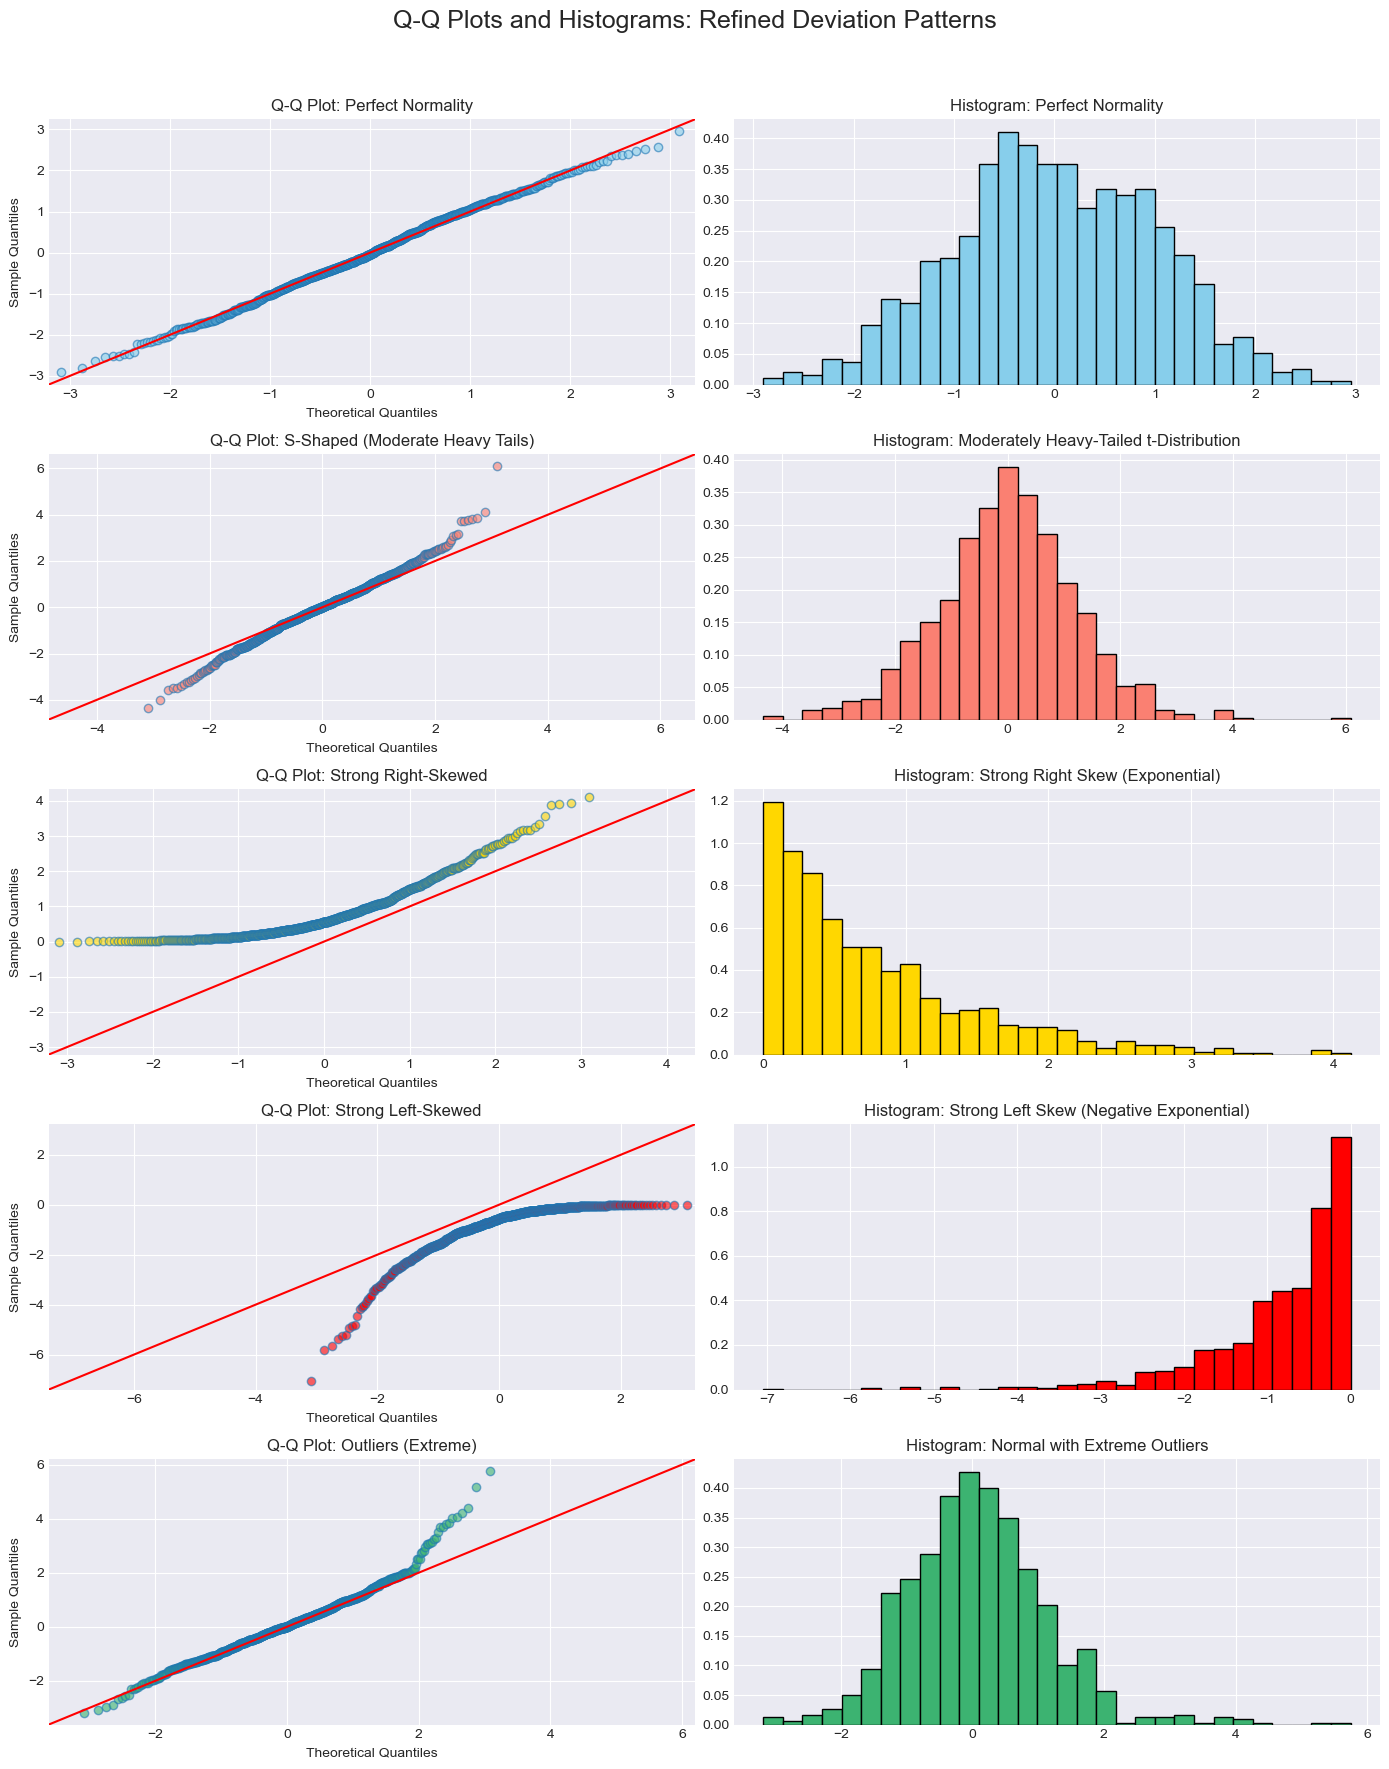

In [6]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 设置图像样式和大小
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(5, 2, figsize=(14, 18))
fig.suptitle("Q-Q Plots and Histograms: Refined Deviation Patterns", fontsize=18)

# 1. 完全匹配正态分布
data1 = np.random.normal(loc=0, scale=1, size=1000)
sm.qqplot(data1, line='45', ax=axes[0, 0], marker='o', markerfacecolor='skyblue', alpha=0.6)
axes[0, 0].set_title("Q-Q Plot: Perfect Normality")
axes[0, 1].hist(data1, bins=30, color='skyblue', edgecolor='black', density=True)
axes[0, 1].set_title("Histogram: Perfect Normality")

# 2. S型曲线：适度厚尾（t分布，df=6）
data2 = stats.t(df=6).rvs(size=1000)
sm.qqplot(data2, line='45', ax=axes[1, 0], marker='o', markerfacecolor='salmon', alpha=0.6)
axes[1, 0].set_title("Q-Q Plot: S-Shaped (Moderate Heavy Tails)")
axes[1, 1].hist(data2, bins=30, color='salmon', edgecolor='black', density=True)
axes[1, 1].set_title("Histogram: Moderately Heavy-Tailed t-Distribution")

# 3. 上凸曲线：右偏分布（指数）
data3 = stats.expon(scale=0.8).rvs(size=1000)
sm.qqplot(data3, line='45', ax=axes[2, 0], marker='o', markerfacecolor='gold', alpha=0.6)
axes[2, 0].set_title("Q-Q Plot: Strong Right-Skewed")
axes[2, 1].hist(data3, bins=30, color='gold', edgecolor='black', density=True)
axes[2, 1].set_title("Histogram: Strong Right Skew (Exponential)")

# 4. 下凹曲线：左偏分布（负指数）
data4 = -stats.expon(scale=0.8).rvs(size=1000)
sm.qqplot(data4, line='45', ax=axes[3, 0], marker='o', markerfacecolor='red', alpha=0.6)
axes[3, 0].set_title("Q-Q Plot: Strong Left-Skewed")
axes[3, 1].hist(data4, bins=30, color='red', edgecolor='black', density=True)
axes[3, 1].set_title("Histogram: Strong Left Skew (Negative Exponential)")

# 5. 离群点偏离直线（正态分布 + 异常值）
data5 = np.random.normal(0, 1, 1000)
data5[:20] += 3  # 添加极端异常值
sm.qqplot(data5, line='45', ax=axes[4, 0], marker='o', markerfacecolor='mediumseagreen', alpha=0.6)
axes[4, 0].set_title("Q-Q Plot: Outliers (Extreme)")
axes[4, 1].hist(data5, bins=30, color='mediumseagreen', edgecolor='black', density=True)
axes[4, 1].set_title("Histogram: Normal with Extreme Outliers")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 解读
#### 完美正态分布（Perfect Normality）
   - **Q-Q图特征**：
        - 所有数据点（蓝色）紧密围绕红色参考线分布，无系统性偏离。
        - 直线性表明样本分位数与理论分位数完全匹配。
   - **直方图特征**： 
        - 对称的钟形曲线，均值=中位数=众数，尾部逐渐变薄。
   - **结论**：数据严格服从正态分布，无需转换或调整。

#### 中度重尾t分布（Moderate Heavy Tails）
   - **Q-Q图特征**：
   - 数据点（紫色）在两端呈现S型弯曲： 
       - 低分位数区域：点低于红线（样本分位数小于理论值）。
       - 高分位数区域：点高于红线（样本分位数大于理论值）。
       - 表明数据尾部比正态分布更厚（极端值更多）。
   - **直方图特征**： 
        - 对称但尾部更宽，峰度（Kurtosis）>3（尖峰）。
   - **结论**：数据具有重尾特性，可能需用稳健统计方法（如t检验替代Z检验）。

#### 强右偏分布（Strong Right-Skewed, Exponential）
   - **Q-Q图特征**：
        - 低分位数：点紧贴或略高于红线（左尾数据稀疏）。
        - 高分位数：点显著上翘，远离红线（右尾数据密集且延伸）。
   - **直方图特征**： 
        - 右侧长尾，众数<中位数<均值（正偏态）。
   - **结论**：数据右偏严重，可尝试对数变换（log-transform）使其接近正态。

#### 强左偏分布（Strong Left-Skewed, Negative Exponential）
   - **Q-Q图特征**： 
        - 低分位数：点大幅下坠，远离红线（左尾数据密集）。
        - 高分位数：点紧贴或略低于红线（右尾数据稀疏）。
   - **直方图特征**： 
        - 左侧长尾，均值<中位数<众数（负偏态）。
   - **结论**：数据左偏，可能需要平方或指数变换。

#### 含极端异常值的正态分布（Normal with Extreme Outliers）
   - **Q-Q图特征**： 
        - 主体数据点（浅蓝色）沿红线分布，但最右侧1-2个点垂直偏离。
        - 异常值对应的样本分位数远大于理论值。
   - **直方图特征**： 
        - 主体呈钟形，但右侧存在孤立的高频极端值。
   - **结论**：数据主体正态，但需检查异常值来源（是否录入错误或特殊事件）。